In [23]:
!pip install mediapipe opencv-python


In [24]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
import base64 # Import the base64 module

# Function to capture an image using the webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const video = document.createElement('video');
            const canvas = document.createElement('canvas');
            const btn = document.createElement('button');
            btn.textContent = 'Capture Photo';
            div.appendChild(video);
            div.appendChild(btn);
            document.body.appendChild(div);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            // Resize the output canvas to match the video dimensions
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;

            // Wait for the button click to take the photo
            await new Promise((resolve) => btn.onclick = resolve);

            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            const image = canvas.toDataURL('image/jpeg', quality);
            div.remove();
            return image;
        }
        takePhoto({quality: %f});
    ''' % quality)

    display(js)
    data = eval_js('takePhoto()')
    binary = base64.b64decode(data.split(',')[1]) # Use base64.b64decode
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Take the photo and save it as a file
filename = take_photo()
print(f"Saved photo to {filename}")

<IPython.core.display.Javascript object>

Saved photo to photo.jpg


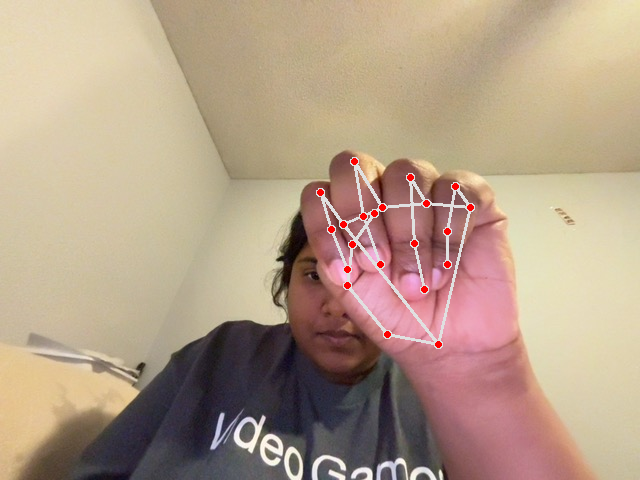

In [25]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

# Initialize MediaPipe hand detection module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Load the captured image
image = cv2.imread('photo.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image to detect hands
results = hands.process(image_rgb)

# Draw hand landmarks on the image
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

# Display the processed image with hand landmarks
cv2_imshow(image)


Detected Sign Language Letter: Unrecognized Gesture


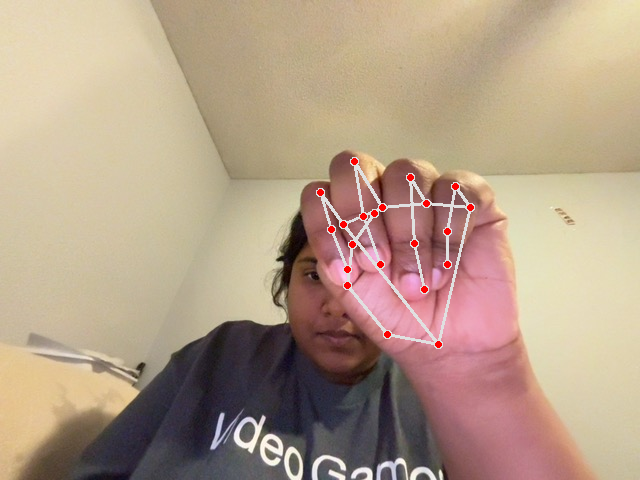

Recognized Sign Language Letter: Unrecognized Gesture


In [26]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

# Initialize MediaPipe hand detection module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Load the captured image
image = cv2.imread('photo.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image to detect hands
results = hands.process(image_rgb)

# Function to interpret hand gestures as sign language letters
def interpret_sign_language(hand_landmarks):
    thumb_tip = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y
    index_finger_tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y
    middle_finger_tip = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y
    ring_finger_tip = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y
    pinky_tip = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y

    # Example of simple sign language gesture detection
    if thumb_tip > index_finger_tip and middle_finger_tip > ring_finger_tip > pinky_tip:
        return "A"  # Closed fist
    elif index_finger_tip < middle_finger_tip < ring_finger_tip < pinky_tip and thumb_tip < index_finger_tip:
        return "B"  # Open palm with fingers together
    elif index_finger_tip < middle_finger_tip and ring_finger_tip > pinky_tip and thumb_tip < index_finger_tip:
        return "V"  # Peace sign (V shape)
    elif thumb_tip < index_finger_tip and middle_finger_tip > ring_finger_tip > pinky_tip:
        return "L"  # L shape with thumb and index finger
    elif all([thumb_tip > index_finger_tip, index_finger_tip > middle_finger_tip, middle_finger_tip > ring_finger_tip, ring_finger_tip > pinky_tip]):
        return "O"  # Circular shape
    else:
        return "Unrecognized Gesture"

# Recognize hand gestures as sign language letters
recognized_sign = None
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        recognized_sign = interpret_sign_language(hand_landmarks)
        print(f"Detected Sign Language Letter: {recognized_sign}")

# Display the image with landmarks
cv2_imshow(image)
print(f"Recognized Sign Language Letter: {recognized_sign}")
